In [ ]:
from helpers import *
import pickle
from itertools import product
import os
import matplotlib.pyplot as plt

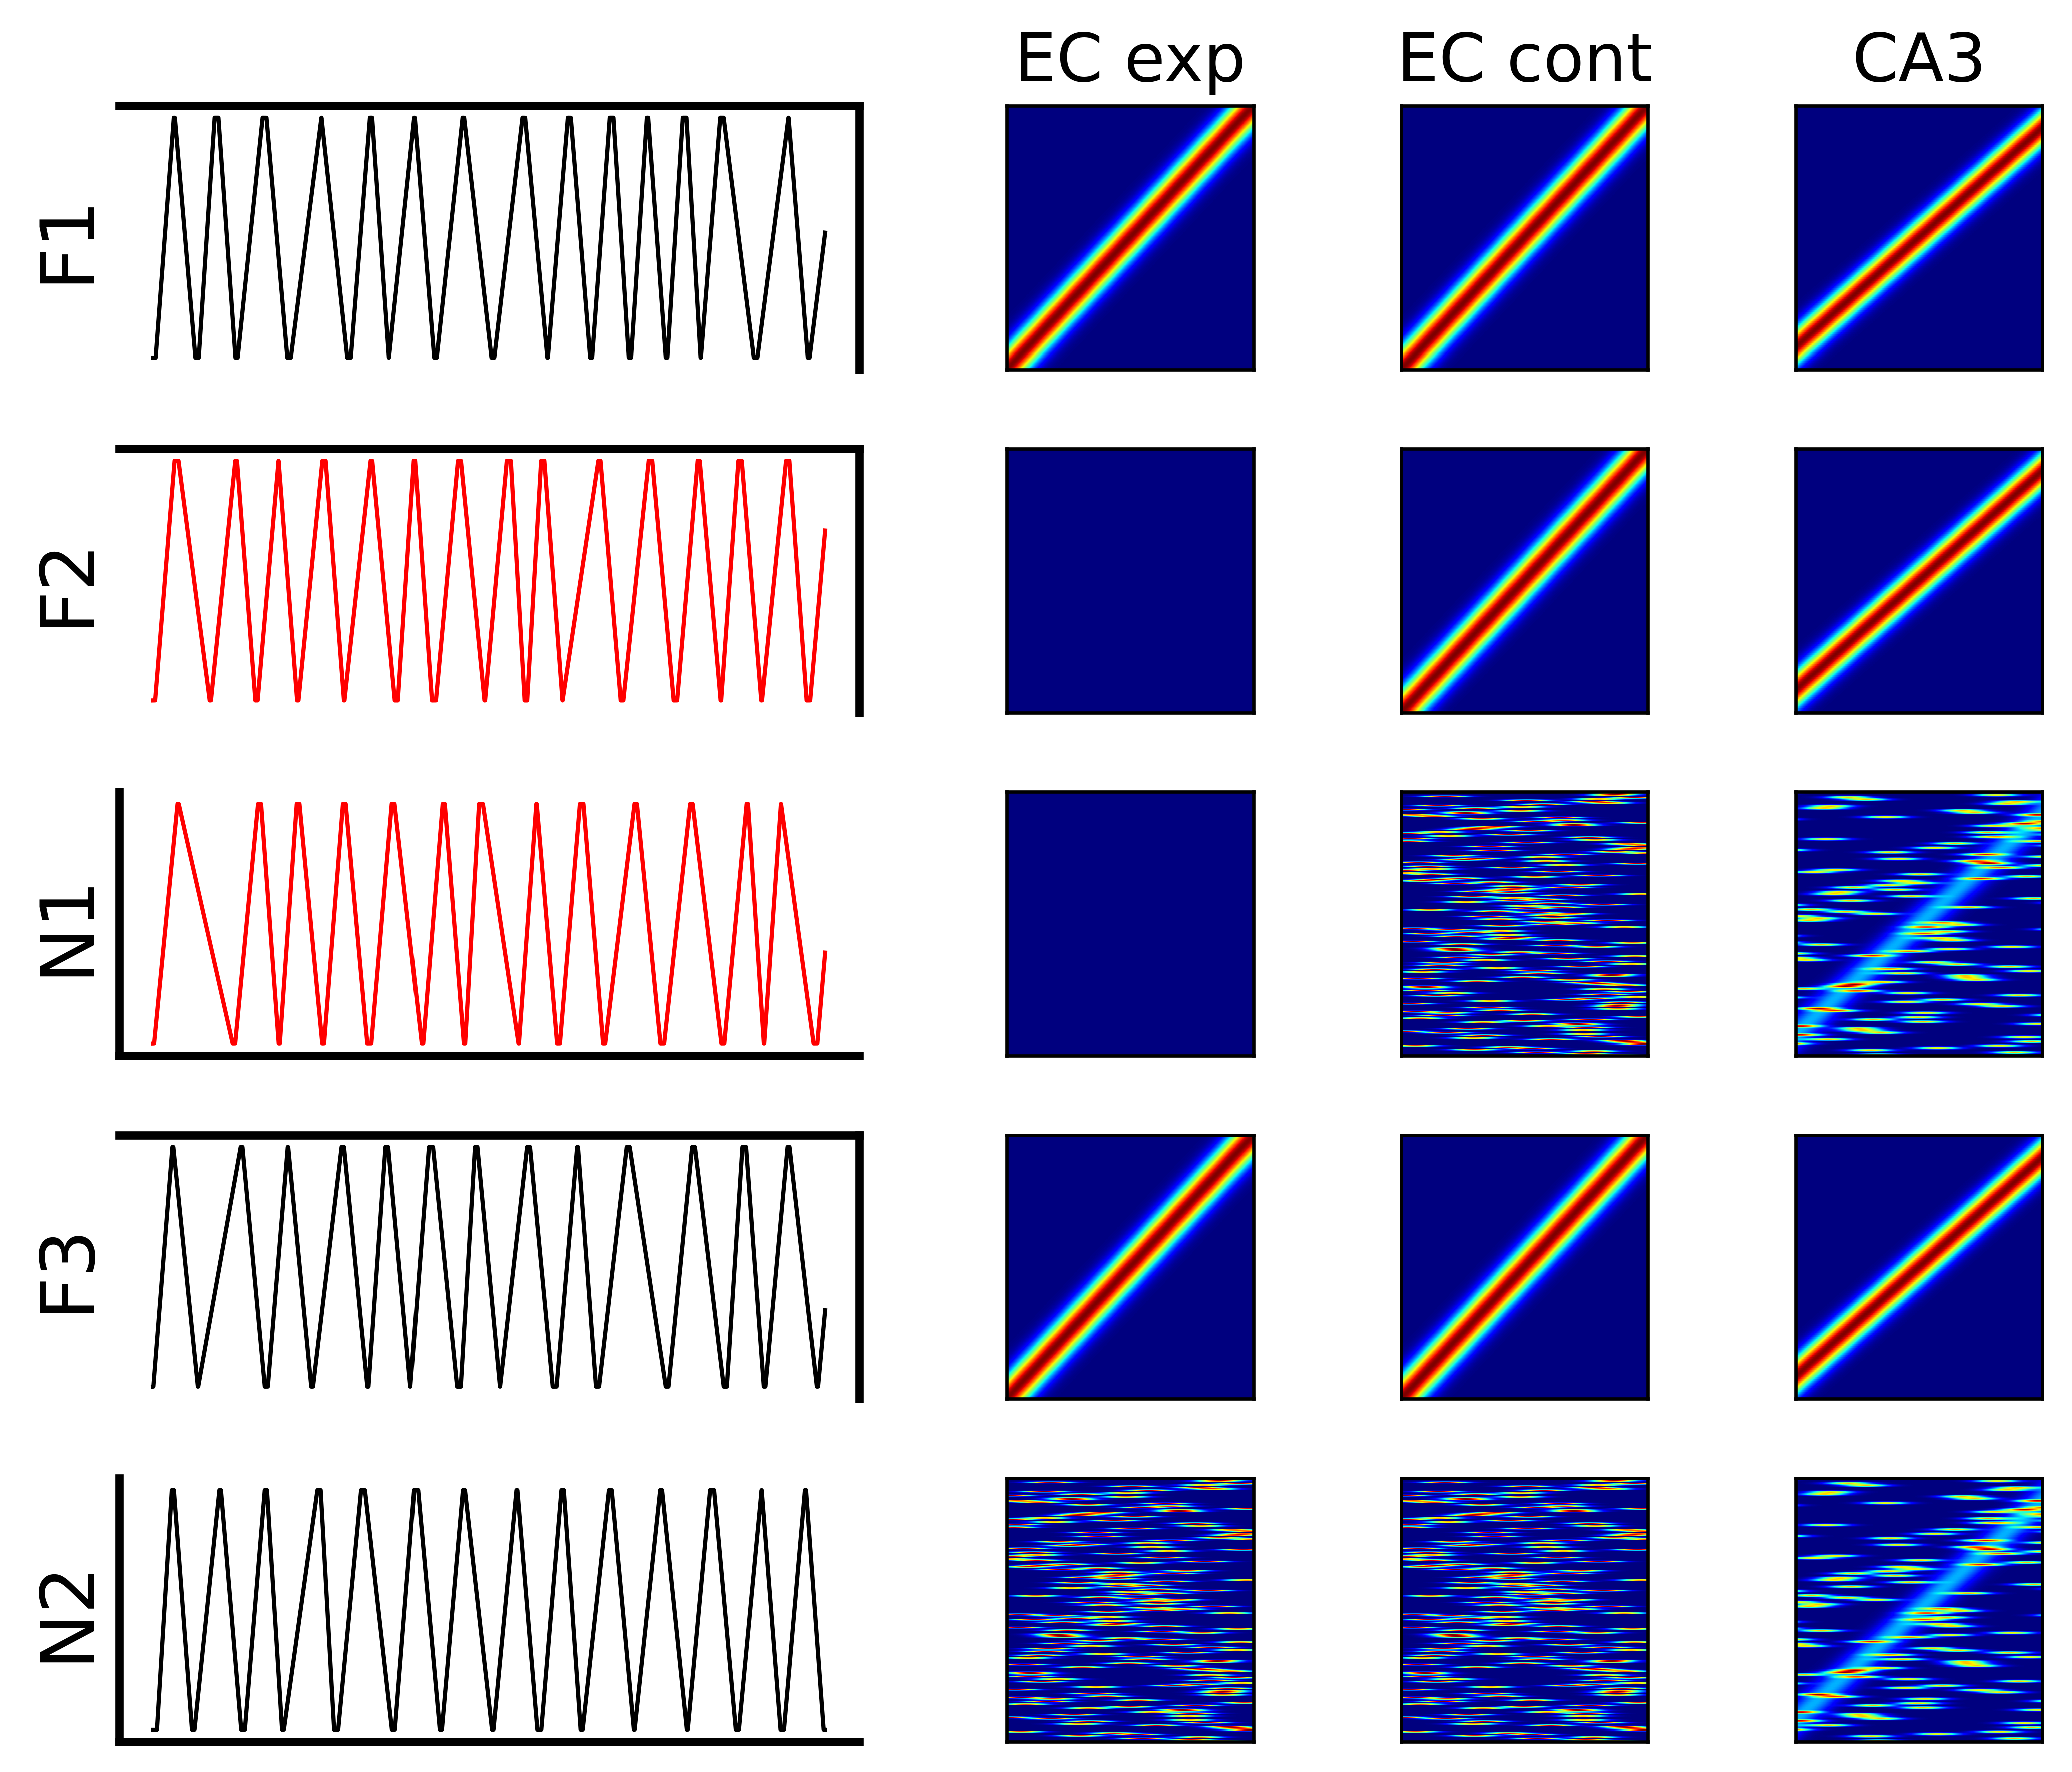

In [3]:
### plot example runs and inputs per condition and stage from 1D simulations

ca1 = PyramidalCells(
    N_CELLS['1D'],
    len_edge=LEN_TRACK_1D,
    n_dim = 1,
    seed=101
)

fig, axs = plt.subplots(
    5, 4,
    figsize=(7, 6),
    sharex='col',
    dpi=600,
    gridspec_kw={'width_ratios': [3, 1, 1, 1]}  # leftmost col twice as wide
)

# Titles for columns 1–3 (heatmaps)
axs[0, 1].set_title("EC experimental")
axs[0, 2].set_title("EC control")
axs[0, 3].set_title("CA3")

# Plot runs in first column
for j, (trial, params) in enumerate(ENVIRONMENTS_RUNS.items()):
    color = 'black' if params['top_down'] else 'red'
    with open(f'simulations/data/1d_2envs/x_run_{trial}.pkl', 'rb') as f:
        t_run, x_run = pickle.load(f)
    plot_run(t_run, x_run, axs[j, 0], color=color, novel=params['new_env'], trial=trial)

# Plot heatmaps in columns 1–3
titles = ['EC exp', 'EC cont', 'CA3']
for i, condition in enumerate(['exp', 'control', 'CA3']):
    area = 'CA3' if condition == 'CA3' else 'EC'
    for j, (trial, params) in enumerate(ENVIRONMENTS_RUNS.items()):
        act = ca1.get_input_map(area=area, env=params['new_env'], a=A if condition == 'CA3' else 0)
        act = np.zeros_like(act) if (not params['top_down'] and condition == 'exp') else act
        sort_TD = np.argsort(ca1.m_CA3) if condition == 'CA3' else np.argsort(ca1.m_EC)
        sorted_fr = act[np.ix_(sort_TD, np.arange(act.shape[1]))]
        out = titles[i] if j == 0 else ""
        plot_firing_rates(axs[j, i+1], sorted_fr, out, vmin=None, vmax=None, fontsize=16, con='')

plt.tight_layout()
plt.subplots_adjust(wspace=0.4, hspace=0.3) 
plt.show()